# HW3

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use for loops (unless explicitly permitted)</li>
</ul>

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Nvidia. 

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('NVDA.csv',index_col=0)
data.index=data.index.astype(np.datetime64)
stock = data['Close']

In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Populating the interactive namespace from numpy and matplotlib


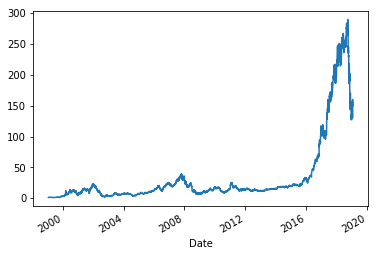

In [3]:
%pylab inline
stock.plot()

In [4]:
stock.head()
stock.tail()

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
Name: Close, dtype: float64

Date
2019-01-23    149.289993
2019-01-24    157.839996
2019-01-25    160.149994
2019-01-28    138.009995
2019-01-29    131.600006
Name: Close, dtype: float64

Use the Series <i>stock</i> to answer the following questions.

## Question 1

### Q1.1, When is the first date this stock close at more than 130 dollars? (pick the closest date in Camino)

In [5]:
stock[stock.values > 130].index[0]

Timestamp('2017-05-15 00:00:00')

### Q1.2, After stock price hit 130 dollar, how many trading days it took to reach the historical high? (pick the closest number of days in Camino)

In [6]:
FirstDay_hit130 = stock[stock.values >= 130].index[0]
FirstDay_hit130

Timestamp('2017-05-15 00:00:00')

In [7]:
Date_hit_max = stock.nlargest(1).index[0]
Date_hit_max

Timestamp('2018-10-01 00:00:00')

In [8]:
stock_130_max = stock[FirstDay_hit130 : Date_hit_max]
stock_130_max.head(1)
stock_130_max.tail(1)

Date
2017-05-15    134.309998
Name: Close, dtype: float64

Date
2018-10-01    289.359985
Name: Close, dtype: float64

In [9]:
len(stock_130_max)

349

### Question 2

### Find the top 5 largest one-day % gain (in % compared to the closing cost of the previous trading day). Make sure that your output is a Series object that shows both date and the % drop. (pick the date closest to the day with the largest gain ratio in Camino)

In [10]:
stock.head()
stock.shift(-1).head()

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
Name: Close, dtype: float64

Date
1999-01-22    1.812500
1999-01-25    1.671875
1999-01-26    1.666667
1999-01-27    1.661458
1999-01-28    1.583333
Name: Close, dtype: float64

In [11]:
((stock.shift(-1) - stock)/stock*100).nlargest()

Date
2000-03-06    42.414523
2003-05-08    33.063514
2001-01-02    30.688937
2016-11-10    29.806706
2000-03-10    26.483055
Name: Close, dtype: float64

## Question 3

###  With following investment strategy: buy on day 1, sell on day 3. If based on this strategy, what's the most dollars amount you can lose in one trading?  Also report the buying and selling date for that particular trading. ( pick the closest dollar amount it dropped in Camino)

In [12]:
stock.head()
stock.shift(-2).head()

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
Name: Close, dtype: float64

Date
1999-01-22    1.671875
1999-01-25    1.666667
1999-01-26    1.661458
1999-01-27    1.583333
1999-01-28    1.614583
Name: Close, dtype: float64

In [13]:
(stock - stock.shift(-2)).nlargest()

Date
2018-11-15    57.690002
2018-11-14    32.760009
2018-10-22    31.809997
2018-10-09    30.410004
2019-01-25    28.549988
Name: Close, dtype: float64

In [14]:
ThreeDays_drop_max = (stock - stock.shift(-2)).nlargest(1).values[0]
ThreeDays_drop_max

57.69000199999999

In [15]:
FirstDay = (stock - stock.shift(-2)).nlargest(1).index[0]
FirstDay

Timestamp('2018-11-15 00:00:00')

In [16]:
stock[stock.index >= FirstDay].head()

Date
2018-11-15    202.389999
2018-11-16    164.429993
2018-11-19    144.699997
2018-11-20    149.080002
2018-11-21    144.710007
Name: Close, dtype: float64

In [17]:
ThirdDay = stock[stock.index >= FirstDay].index[2]
ThirdDay

Timestamp('2018-11-19 00:00:00')

In [18]:
print("The beginning date which has the largest 3 days dollar amount drop is " + str(FirstDay))
print("The ending date is " + str(ThirdDay) )
print("Total dollar amount it dropped is $" + str(ThreeDays_drop_max) )

The beginning date which has the largest 3 days dollar amount drop is 2018-11-15 00:00:00
The ending date is 2018-11-19 00:00:00
Total dollar amount it dropped is $57.69000199999999


Manually verify the stock price close to those 3 days

In [19]:
stock['2018-11-13':'2018-11-20']

Date
2018-11-13    199.309998
2018-11-14    197.190002
2018-11-15    202.389999
2018-11-16    164.429993
2018-11-19    144.699997
2018-11-20    149.080002
Name: Close, dtype: float64

## Question 4

### In which days did we observe that the price has increased of more than 60% within the 9 preceding trading sessions? Report your result as a Series (d,gain) where *d* is the trading session date when the increase was observed and *gain* is the maximum percentage gain (%) observed over the 9 days preceding session(today compare with previous 9 trading days).
#### *Hint:* use a **rolling** minimum (pick the closest date that has the highest gain ratio in Camino) 

<div class="alert alert-block alert-success"> Solution Note </div>

**Solution Note:** Today + 9 more days -> use rolling(10).  Use stock.rolling(10).min() to find the lowest point within that 10 days windows(rol_min). Price increase is -> (everyday price - rol_min), for increase %, need to divided based on the lowest price so it is (everyday price - rol_min)/rol_min. 

Create a boolean mask which satisfy the 60% increase, then bring the boolean mask back to the increase % formula.

In [20]:
stock.head(10)
stock.rolling(10).min().head(10)

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
1999-01-29    1.583333
1999-02-01    1.614583
1999-02-02    1.489583
1999-02-03    1.520833
1999-02-04    1.604167
Name: Close, dtype: float64

Date
1999-01-22         NaN
1999-01-25         NaN
1999-01-26         NaN
1999-01-27         NaN
1999-01-28         NaN
1999-01-29         NaN
1999-02-01         NaN
1999-02-02         NaN
1999-02-03         NaN
1999-02-04    1.489583
Name: Close, dtype: float64

1999-02-04 price increase in rolling(10).min() window is  (1.604167- 1.489583)/1.489583 = 0.0769  (7.69%)

In [21]:
rol_min=stock.rolling(10).min()

In [22]:
gain_boolean_mask = ((stock - rol_min)/rol_min) > 0.6

In [23]:
(gain_boolean_mask).sum()

13

In [24]:
rol_min[gain_boolean_mask]

Date
2000-02-18    3.171875
2000-02-22    3.322917
2000-02-23    3.406250
2000-03-09    4.828125
2000-03-10    4.828125
2000-03-13    4.828125
2000-03-14    4.828125
2000-03-15    4.828125
2000-03-16    4.875000
2000-03-17    4.875000
2001-01-11    4.989583
2001-10-12    7.960000
2001-10-15    7.960000
Name: Close, dtype: float64

In [25]:
stock[gain_boolean_mask]

Date
2000-02-18     5.614583
2000-02-22     5.458333
2000-02-23     5.489583
2000-03-09     8.358067
2000-03-10     9.833333
2000-03-13    12.437500
2000-03-14     9.177083
2000-03-15     8.802083
2000-03-16     7.847650
2000-03-17     8.322917
2001-01-11     8.000000
2001-10-12    13.476666
2001-10-15    13.416667
Name: Close, dtype: float64

In [26]:
(stock[gain_boolean_mask] - rol_min[gain_boolean_mask]) \
    / rol_min[gain_boolean_mask] * 100

Date
2000-02-18     77.011484
2000-02-22     64.263296
2000-02-23     61.162070
2000-03-09     73.112067
2000-03-10    103.667739
2000-03-13    157.605178
2000-03-14     90.075506
2000-03-15     82.308515
2000-03-16     60.977436
2000-03-17     70.726503
2001-01-11     60.334040
2001-10-12     69.304849
2001-10-15     68.551093
Name: Close, dtype: float64

## Question 5

### What was the **worst** possible "buy&sell" operation? Find the two days x and y so that the % loss resulting from buying in x and selling in y (with y after x) is maximized. Your code should work for any data. 
#### *Hint:* Use method cummax() or method cummin(). *Cummax/Cummax* returns the maximum/minimum value encountered so far. Make sure to return the trading days x and y, as well as the % loss resulting from buying in x and selling in y.
#### (Fill in blank for the buying and selling dates in Camino with the format 'buying-date/selling-date' (for example, 2001-01-01/2010-12-31)

<div class="alert alert-block alert-success"> Solution Note </div>

**Solution Note** . Need to 'buy'(high) first, then 'sell'(low) later. High need to be historic high. .cummax will hold the highest price history, So the cummax will be the buying date and current be the selling date. When use .cummax, should be (cummax - current)/current if take .nlargest(1), then that's our selling date info.

### Use cummax()

Need to buy high then sell low. Buy need to happen first. High need to be historic high, so use cummax() without flipping the date.

In [27]:
stock[:5]
stock.cummax()[:5]

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.671875
1999-01-27    1.666667
1999-01-28    1.661458
Name: Close, dtype: float64

Date
1999-01-22    1.640625
1999-01-25    1.812500
1999-01-26    1.812500
1999-01-27    1.812500
1999-01-28    1.812500
Name: Close, dtype: float64

In [28]:
max_from_now = stock.cummax()

To get the selling date y1 ..

In [29]:
y1 = ((max_from_now - stock)/ stock).nlargest(1).index[0]
y1

Timestamp('2002-10-09 00:00:00')

Or ..

In [30]:
y1 = ((stock - max_from_now)/ stock).nsmallest(1).index[0]
y1
stock[y1]

Timestamp('2002-10-09 00:00:00')

2.456667

To get the buying date x1 ..

In [31]:
x1 = stock[stock == max_from_now[y1]].index[0]
x1
stock[x1]

Timestamp('2002-01-03 00:00:00')

23.903334

In [32]:
print('The worst buy & sell combination is:\n')
print('First buy on ' + str(x1) +', when the price was ' + 
      str(stock[x1]))
print('Then sell on ' + str(y1) +', when the price was ' +
      str(stock[y1]))
print('The loss is ' + str((stock[x1] - stock[y1]) * 100 / stock[x1]) + 
      '%')

The worst buy & sell combination is:

First buy on 2002-01-03 00:00:00, when the price was 23.903334
Then sell on 2002-10-09 00:00:00, when the price was 2.456667
The loss is 89.72249226823338%


### Use cummin()

<div class="alert alert-block alert-success"> Solution Note </div>

**Solution Notes**: Buy high then sell low.
If use .cummin(). Need to know lowest in the future, so need to flip the stock, most recent dated first. If don't flip, .cummin() will return the 'history' low, which is not helpful.

After know the future low, so "(current-future low)/current" will be the delta, then take .nlargest(1), that will be our buying date. 

Sort from the last day to the first, and for each day compute cummin: in this way, for each trading day x we compute the minimum price on or after day x

In [33]:
minimum_from_now_on = stock.sort_index(ascending=False).cummin()

In [34]:
stock.sort_index(ascending=False)[:5]

Date
2019-01-29    131.600006
2019-01-28    138.009995
2019-01-25    160.149994
2019-01-24    157.839996
2019-01-23    149.289993
Name: Close, dtype: float64

In [35]:
minimum_from_now_on[:5]

Date
2019-01-29    131.600006
2019-01-28    131.600006
2019-01-25    131.600006
2019-01-24    131.600006
2019-01-23    131.600006
Name: Close, dtype: float64

Find the trading day x where buying in x and selling at the worst future day maximimizes the loss

In [36]:
x = ((stock - minimum_from_now_on) / stock).nlargest(1).index[0]
x
stock[x]

Timestamp('2002-01-03 00:00:00')

23.903334

Find the trading day y when to sell

In [37]:
y = stock[stock == minimum_from_now_on[x]].index[0]
y
stock[y]

Timestamp('2002-10-09 00:00:00')

2.456667

In [38]:
print('The worst buy & sell coombination is:\n')
print('First buy on ' + str(x) +', when the price was ' + 
          str(stock[x]))
print('Then sell on ' + str(y) +', when the price was ' + 
          str(stock[y]))
print('The loss is ' + str((stock[x] - stock[y]) * 100 / stock[x]) + '%')

The worst buy & sell coombination is:

First buy on 2002-01-03 00:00:00, when the price was 23.903334
Then sell on 2002-10-09 00:00:00, when the price was 2.456667
The loss is 89.72249226823338%
